In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.io import imread
from skimage.feature import hog
import matplotlib.pyplot as plt
from utilities import *
from sklearn.cluster import KMeans

PyDIPjavaio unavailable:
libjvm.so: cannot open shared object file: No such file or directory

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


ModuleNotFoundError: No module named 'sklearn'

In [2]:
dip_images, dip_names = load_dip_images('transformed/crop_orig_resize')
# dip_blues, dip_names = load_dip_images('blues')
# dip_grays, dip_names = load_dip_images('gray')
# dip_thresh, dip_names = load_dip_images('thresh')
dip_transf, dip_names = load_dip_images('transformed/crop_embr_transf')
# blue_areas, dip_names = load_dip_images('blue_areas')
# # blue_grays, dip_names = load_dip_images('blue_grays')
# hog_imgs_shape, dip_names = load_dip_images('hog_embryos')
# hog_imgs_blue, dip_names = load_dip_images('hog_blues')
# crop_original, dip_names = load_dip_images('crop_original')


In [ ]:
features = ['Perimeter', 'Size',
                'Circularity', 'Roundness',
                'StandardDeviation', 'Minimum','Maximum']

label_images, measurements = measure_elements(dip_transf,dip_blues, features)

areas, perimeters, circularity, roundness, stand_dev, minimum, maximum = measurements_array(measurements, features)

In [ ]:
label_images, measurements = measure_elements(dip_transf, dip_blues, features)
areas, perimeters, circularity, roundness, stand_dev, minimum, maximum = measurements_array(measurements, features)
# blue_areas, m_blues, blue_grays = blue_area(crop_original,features)
# areas_blue, perimeters_blue, circularity_blue, roundness_blue, std_blue, minimum_blue, maximum_blue = measurements_array(m_blues, features)


In [ ]:
tot_area_blue = []
tot_perim_blue = []
tot_std_blue = []
for i in range(len(areas_blue)):
    tot_area_blue.append(np.sum(areas_blue[i]))
    tot_perim_blue.append(np.sum(perimeters_blue[i]))
    tot_std_blue.append(np.sum(std_blue[i]))

blue_rel_area = np.divide(tot_area_blue,areas)
blue_rel_perim = np.divide(tot_perim_blue,perimeters)
perc_area_blues = blue_rel_area*100
perc_perim_blues = blue_rel_perim*100

In [ ]:
d = {'area': areas, 'perimeter': perimeters, 'roundness':roundness, 'circularity':circularity, 
                'area_blue': tot_area_blue, 'perimeter_blue': tot_perim_blue,
                'relative_blue_area': blue_rel_area, 'relative_perim_area': blue_rel_perim,
                'percentage_area_blue': perc_area_blues, 'percentage_perim_blue': perc_perim_blues, 'std_blue':tot_std_blue}
df = pd.DataFrame(data=d)

In [ ]:
df

In [ ]:
d = {'std_embryo':stand_dev,'std_blue':tot_std_blue}
df_texture = pd.DataFrame(data=d)

In [ ]:
df_texture

In [ ]:
plt.hist(stand_dev) 


In [ ]:
plt.hist(tot_std_blue)

In [ ]:
norm_original = []

for i in range(len(dip_images)):
    arr = np.array(dip_images[i])
    max = np.amax(arr)
    min = np.amin(arr)
    norm_original.append(dip.Image((np.array(dip_images[i]) - min) / (max - min)))




In [ ]:
blues = make_grayscale(norm_original)
save_images(blues, 'blues', "blue", file_type=["tif"])

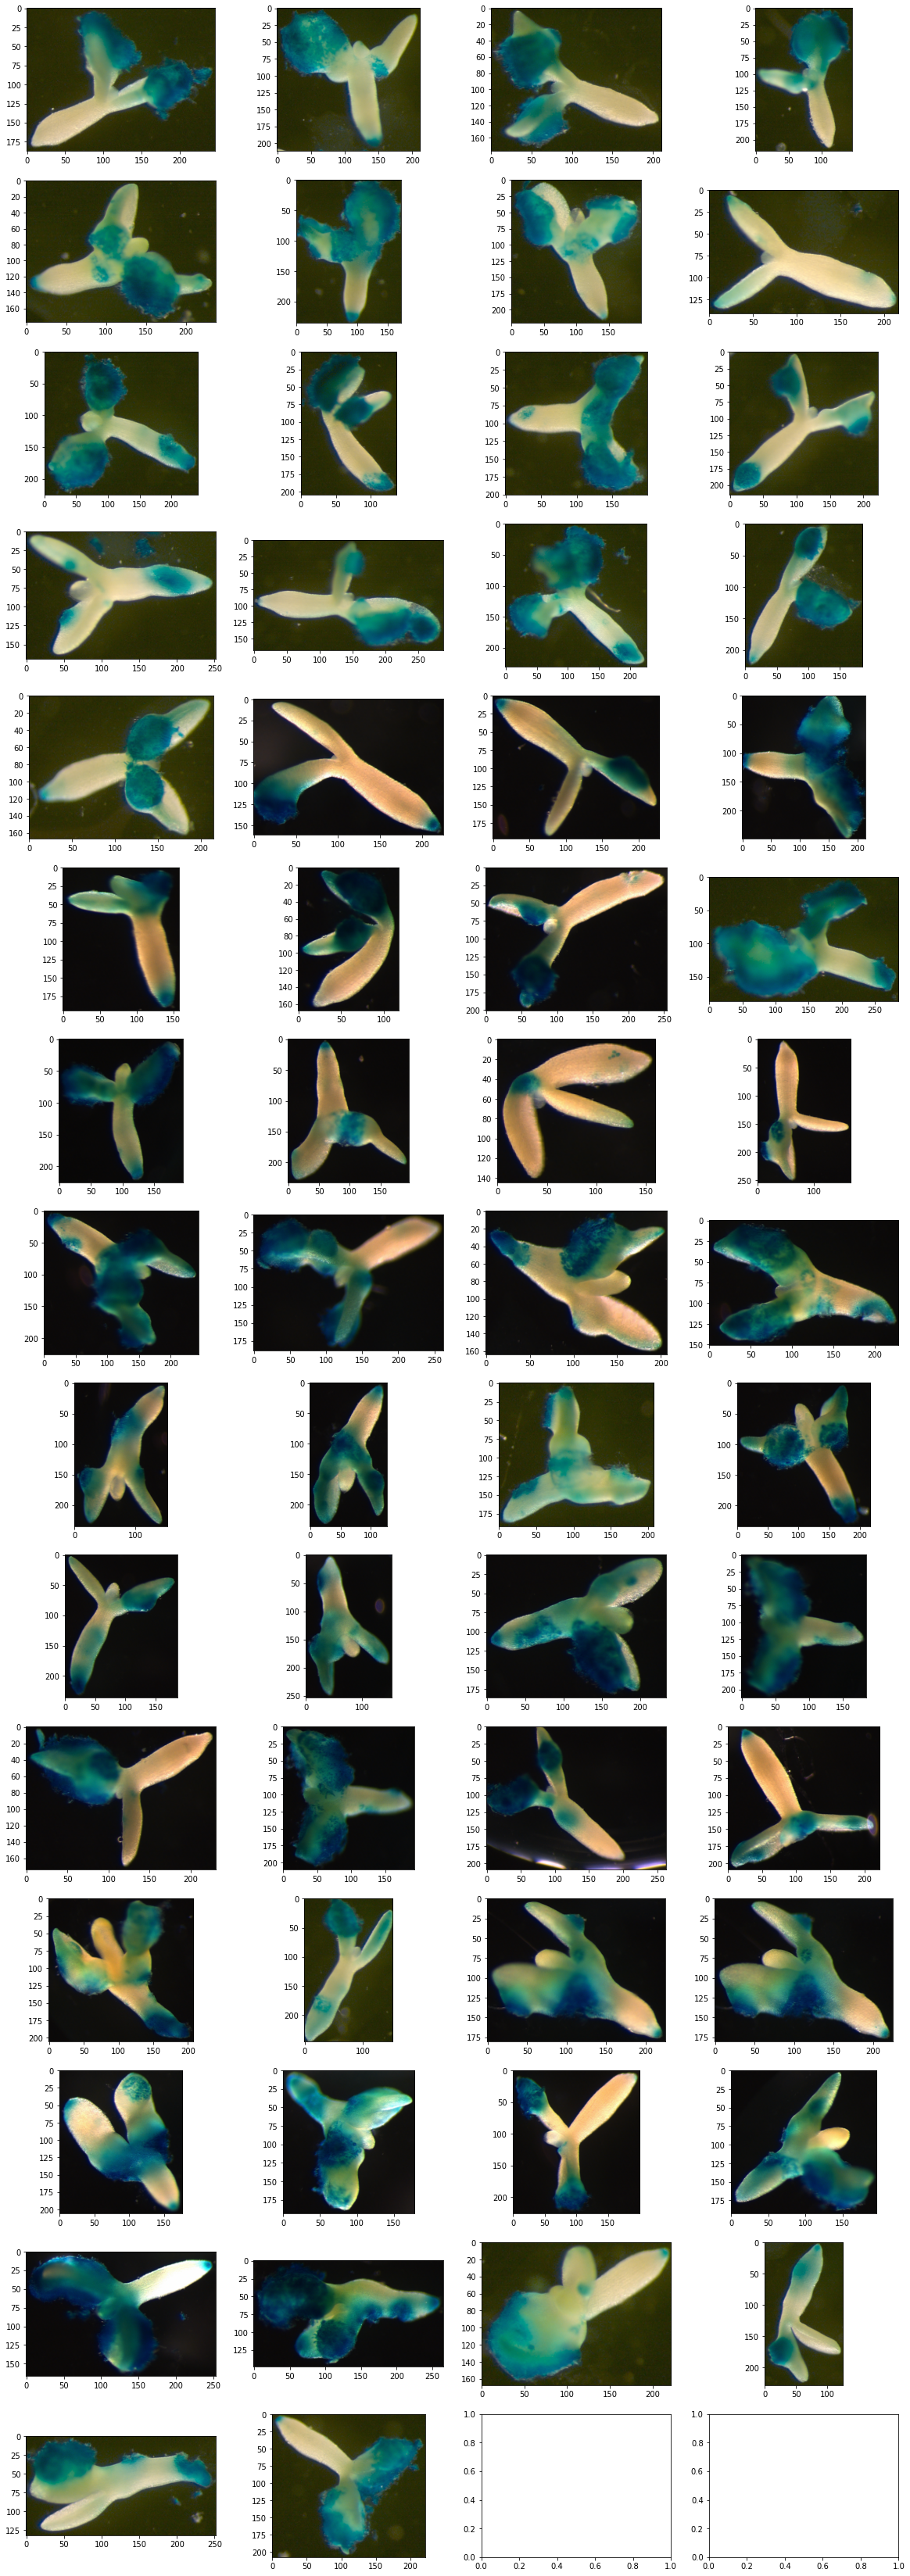

In [3]:
counter = 0
fig, ax = plt.subplots(15,4,figsize=(20,60))
for x in range(15):
    for y in range(4):
        if counter > 57:
            continue
        ax[x,y].imshow(dip_images[counter], cmap='binary_r')
        counter += 1

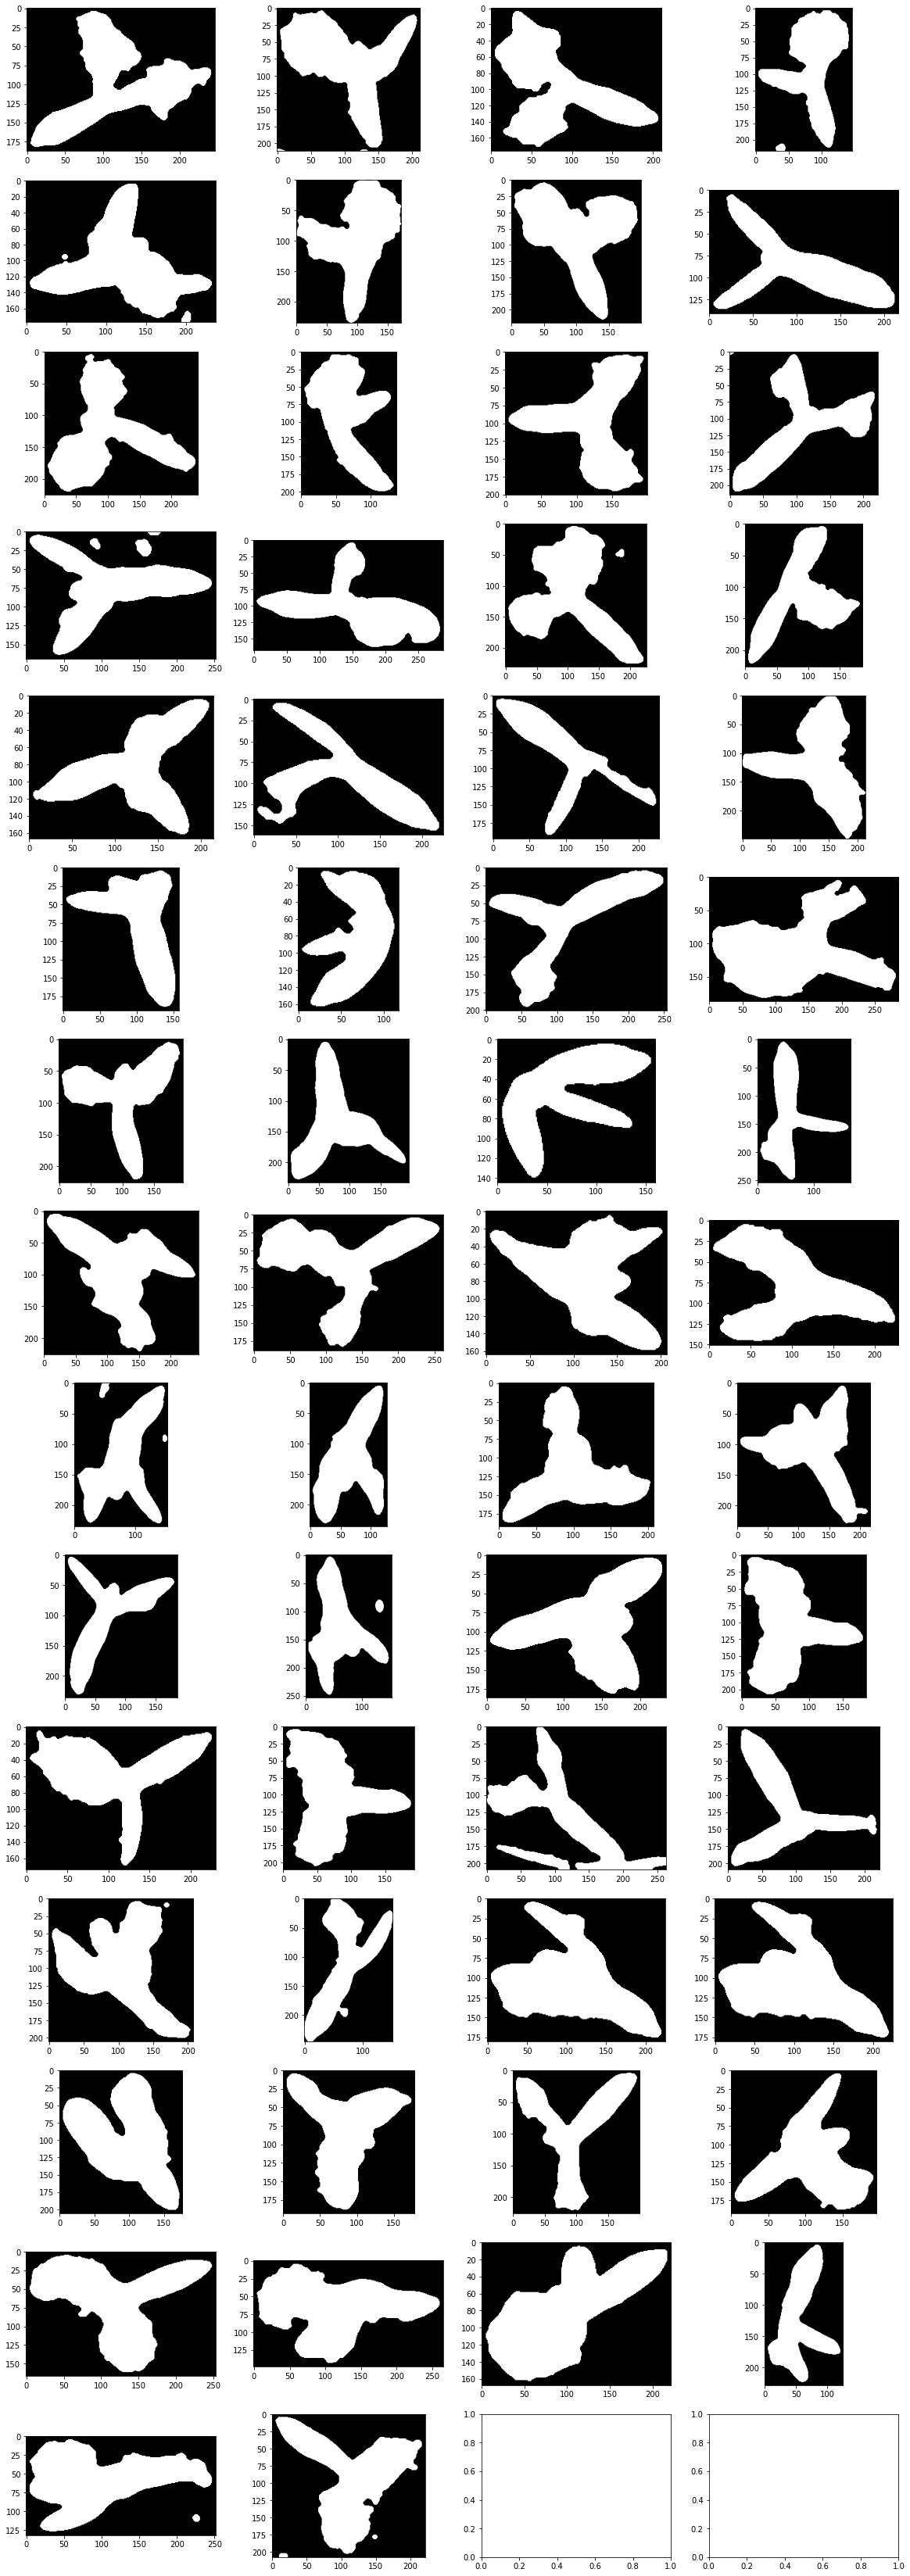

In [4]:
counter = 0
fig, ax = plt.subplots(15,4,figsize=(20,60))
for x in range(15):
    for y in range(4):
        if counter > 57:
            continue
        ax[x,y].imshow(dip_transf[counter], cmap='binary_r')
        counter += 1

In [ ]:
def blue_area(dip_images: list,features):
    """ Converts the diplip images to unit8 and threshold them to extract the gene expression
    """
    grays = []
    blue_areas = []
    m =[]
    for img in dip_images:
        unit8 = dip.Convert(img, "UINT8")
        gauss = dip.Gauss(unit8,sigmas=[20,20])
        x = np.array(gauss)
        gray = x[:,:,0]
        grays.append(dip.Image(gray))
        thresh = dip.OtsuThreshold(gray)
        thresh = dip.Opening(thresh)
        thresh = dip.Closing(thresh)
        thresh = dip.Erosion(thresh)
        thresh = dip.Dilation(thresh)
        # thresh = dip.FillHoles(thresh)
        arr = np.array(thresh)
        inverted = 1 - arr
        inverted = ~ arr
        label = dip.Label(dip.Image(inverted), connectivity=1)
        blue_areas.append(dip.Image(inverted))
        m.append(dip.MeasurementTool.Measure(label, dip.Image(gray), features = features))
    return blue_areas, m, grays

In [ ]:
arr = np.array(crop_original[0])
arr0 = arr[:,:,0]
arr1 = arr[:,:,1]
arr2 = arr[:,:,2]

crop_original[0].Show()
a = dip.Image(arr1-arr0)
a = dip.Gauss(a, sigmas=[0.5])
a=dip.Kuwahara(a, kernel='line',threshold = 10)
a.Show()
a = dip.OtsuThreshold(a)
# a = dip.Opening(a)
a = dip.Closing(a)
a = dip.Erosion(a)
# a = dip.Dilation(a)

# a = dip.FillHoles(a)
a.Show()